# Lending Club case study
#### Problem Statement
#### Business Understanding
 A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

> - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

> - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
#### Business Objectives
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 200

In [3]:
loan = pd.read_csv("loan.csv",low_memory=False)
loan.head(n=10)
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 1. Data cleaning 
### Fix columns
### Dropping all columns with all NaN values


- Check column percentage of null values in descending order - around 54 columns are present with NaN values
- Dropping columns having all row values as NaN.
- There are 3 columns with higher % of null values so dropping those col too
>- next_pymnt_d                  97.13
> - mths_since_last_record        92.99
> - mths_since_last_delinq        64.66


In [5]:
print(round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False).head(10))
loan.dropna(axis=1,how='all',inplace=True)
#Check the shape after dropping the unnecessary columns
loan.shape

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
acc_open_past_24mths          100.0
inq_last_12m                  100.0
total_cu_tl                   100.0
inq_fi                        100.0
total_rev_hi_lim              100.0
dtype: float64


(39717, 57)

In [6]:
print(round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False).head(10))
loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],inplace=True)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
dtype: float64


In [7]:
print(round(100*(loan.isnull().sum()/len(loan.index)), 2).sort_values(ascending=False).head(10))
# Shape after dropping  columns with high % of null values
loan.shape

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64


(39717, 53)

### Removing all columns with all Zero values

As we know we still have 54 columns out of which few of the  columns are not use full for analysis
- Dropping unnecessary column Columns like the following:
> - application_type;
> - id;
> - member_id;
> - delinq_amnt;
> - tax_liens
> - chargeoff_within_12_mths;
> - collections_12_mths_ex_med;
> - initial_list_status;
> - policy_code
> - pymnt_plan




In [8]:
loan.head(n=10)
drop_col = ['application_type','member_id','id','delinq_amnt','tax_liens','initial_list_status','policy_code','chargeoff_within_12_mths','collections_12_mths_ex_med','pymnt_plan']
loan.drop(drop_col,axis=1,inplace=True)
loan.shape

(39717, 43)

### Removing columns which are *Irrelevant* or *Redundant* based on their description and values
- Dropping unnecessary column Columns because Customer behaviour variables which are not available during time of loan processing

In [9]:
drop_col_2 = ['collection_recovery_fee','emp_title','last_credit_pull_d',
                'last_pymnt_amnt','last_pymnt_d', 'recoveries','revol_bal','title','total_pymnt','total_pymnt_inv',
                'total_rec_int','total_rec_late_fee','total_rec_prncp','url','zip_code','out_prncp', 'out_prncp_inv', 
                 'acc_now_delinq', 'revol_util', 'delinq_2yrs', 'open_acc', 'total_acc']

loan.drop(drop_col_2,axis=1,inplace=True)
loan.shape

(39717, 21)

###  Dropping rows with null values for specific columns
- Only 'charged Off' and 'Fully paid' loan status are considered for this analysis. So removing the rows with Current loan status.

In [10]:
loan = loan[~loan['emp_length'].isnull()]
loan = loan[~loan['pub_rec_bankruptcies'].isnull()] 

In [11]:
loan = loan[loan.loan_status != 'Current']
loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
pub_rec                 0
pub_rec_bankruptcies    0
dtype: int64

### 2.  Datatype Cleaning
1. Convert emp_length to integer
2. Removing the % sign and convert int_rate to float
3. Removing the trailing space in term value
4. Creating is_default column which is an integer representation of loan status
5. Convert Issue_d month-year into seperate month and year columns


In [12]:
loan.int_rate = loan.int_rate.str.replace('%','').astype('float')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,0,0.0


In [13]:
loan.emp_length = loan.emp_length.str.replace('years','').str.replace('year','').str.strip()
loan.emp_length = loan.emp_length.replace('10+','10').replace('< 1','0').str.strip().astype('float')

loan.term = loan.term.str.strip() 

In [14]:
loan['term'] = loan['term'].apply(lambda x: x.lstrip())

In [15]:
loan['is_default'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0) 

In [16]:
from datetime import datetime

loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['issue_month'] = loan['issue_d'].apply(lambda x: x.month)
loan['issue_year'] = loan['issue_d'].apply(lambda x: x.year)

## 3. Univariate analysis
#### Below variables are being considered for continuous univariate analysis
- loan_status
- Annual Income
- Loan Amount 
- Interest Rate 
- dti
- Revol_util
- Grade
- Address State 
- Purpose


### 3.1.  Column name: Loan status - Current status of the loan



In [17]:
loan[loan.loan_status == 'Charged Off'].count()

loan_amnt               5281
funded_amnt             5281
funded_amnt_inv         5281
term                    5281
int_rate                5281
installment             5281
grade                   5281
sub_grade               5281
emp_length              5281
home_ownership          5281
annual_inc              5281
verification_status     5281
issue_d                 5281
loan_status             5281
purpose                 5281
addr_state              5281
dti                     5281
earliest_cr_line        5281
inq_last_6mths          5281
pub_rec                 5281
pub_rec_bankruptcies    5281
is_default              5281
issue_month             5281
issue_year              5281
dtype: int64

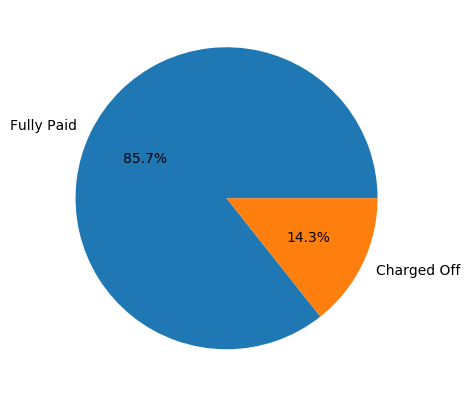

In [18]:
loan_status_dist = loan.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
plt.figure(figsize=[5.0,5.0],dpi=100)
loan_status_dist.head()
plt.pie(loan_status_dist,autopct='%1.1f%%',labels=labels)
plt.show()

### From the above pie chart we can showcase that:<font color=blue> 85.4 % is fully paid and 14.6% of the total loans are Charged off  or defaulted in given dataset of LC</font>


### 3.2 Column name: annual_inc: The self-reported annual income provided by the borrower during registration.
14.6% of the total loans are defualted in given dataset of LC

In [19]:
pd.options.display.float_format = '{:.2f}'.format
df_loan_annual_inc = loan.loc[:,['annual_inc']]
loan['annual_inc'].describe()

count     36847.00
mean      69404.48
std       64027.47
min        4000.00
25%       41004.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [20]:
df_loan_annual_inc['annual_inc'].quantile(0.99)

235000.0

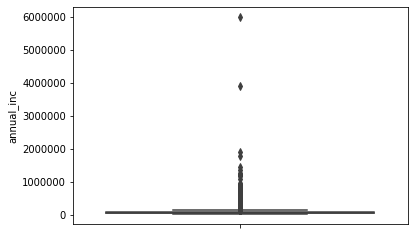

In [21]:
sns.boxplot(data=df_loan_annual_inc, y='annual_inc')
plt.show()

In [22]:
df_loan_annual_inc['annual_inc'] = df_loan_annual_inc[df_loan_annual_inc['annual_inc'] < df_loan_annual_inc['annual_inc'].quantile(0.99)]

In [23]:
df_loan_annual_inc['annual_inc'].describe()

count    36477.00
mean     65964.37
std      35107.46
min       4000.00
25%      41000.00
50%      59000.00
75%      81960.00
max     234996.00
Name: annual_inc, dtype: float64

### After removing the outliers we can see that max value reduced to 234000

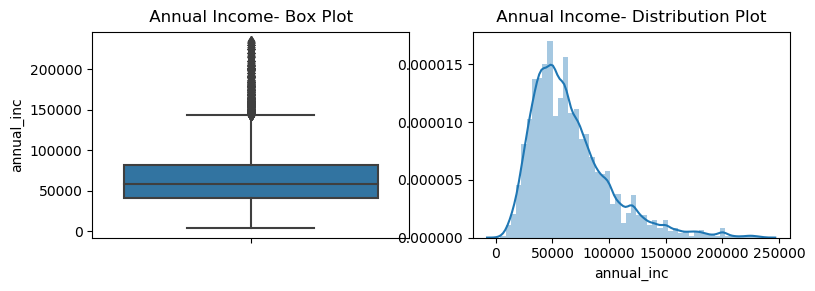

In [24]:
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='w',frameon=True)
plt.subplot(221)
title_1 = ' Annual Income- Box Plot '
plt.title(title_1,pad=7)
sns.boxplot(data=df_loan_annual_inc, y='annual_inc')


plt.subplot(222)
title_1 = ' Annual Income- Distribution Plot '
plt.title(title_1,pad=7)
sns.distplot(df_loan_annual_inc['annual_inc'].dropna(),norm_hist=False)
plt.show()

### Outcome
#### Through box plot we can derive thta majority of applicants are having annual income between 20000 to 150000 USD and through dist plot we can derive that maximum count is at 60000 and 50000 USD 
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.3 Column name: funded_amnt: The total amount committed to that loan at that point in time.

In [25]:
loan.funded_amnt.quantile(0.99)
loan.funded_amnt.describe()

count   36847.00
mean    10872.92
std      7109.33
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

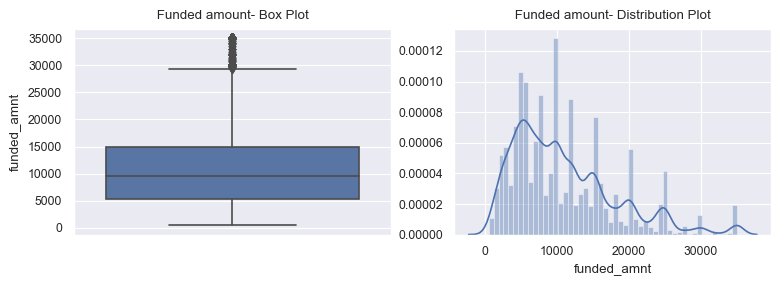

In [26]:
sns.set(context='paper')
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='w',frameon=True)
plt.subplot(221)
sns.boxplot(data=loan, y='funded_amnt')
title_1 = ' Funded amount- Box Plot '
plt.title(title_1,pad=7)

plt.subplot(222)
title_1 = ' Funded amount- Distribution Plot '
plt.title(title_1,pad=7)
sns.distplot(loan['funded_amnt'].dropna(),norm_hist=False)
plt.show()

> Majority of applicants receive loan between 5k to 20k USD and Lending Club provides loan of minimum 500 to max 35k USD

### 3.4 Column name: int_rate: Interest Rate on the loan
#### After plotting the distribution and box plot : Majority of applicants received loans at the interest rate between 5% to 15%

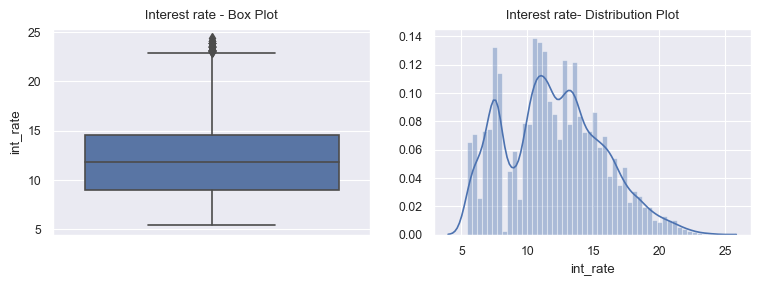

In [27]:
sns.set(context='paper')
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='w',frameon=True)
plt.subplot(221)
sns.boxplot(data=loan, y='int_rate')
title_1 = ' Interest rate - Box Plot '
plt.title(title_1,pad=7)

plt.subplot(222)
title_1 = ' Interest rate- Distribution Plot '
plt.title(title_1,pad=7)
sns.distplot(loan['int_rate'].dropna(),norm_hist=False)
plt.show()

### 3.5 Column name: dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- After plotting the distribution and box plot : Majority of applicants have dti between 0 to 25  
- It is observed that lending club is approving very few loans of applicants having dti between 26 to 30 and not approving any loans to the applicants having dti

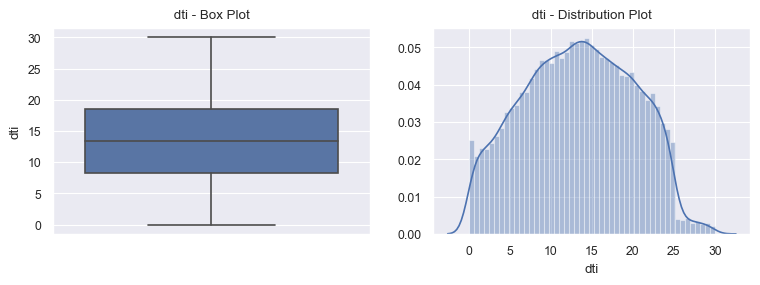

In [28]:
sns.set(context='paper')
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='w',frameon=True)
plt.subplot(221)
sns.boxplot(data=loan, y='dti')
title_1 = ' dti - Box Plot '
plt.title(title_1,pad=7)

plt.subplot(222)
title_1 = ' dti - Distribution Plot '
plt.title(title_1,pad=7)
sns.distplot(loan['dti'].dropna(),norm_hist=False)
plt.show()

### 4 Univariate analysis - categorical
- Column=grade [categorical] - Lending club  assigned loan grade
- After plotting the bar plot we can observe majority of loans approved by LC seems to be From Grade A to D - because of low risk.

*For Analysis, some continous values has to be converted into binned categories*

1. Loan Amount
2. Interest Rate
3. Annual Income
4. Employee Length
5. DTI
6. Installment

In [29]:
loan['int_rate'].describe()

count   36847.00
mean       11.99
std         3.70
min         5.42
25%         8.94
50%        11.86
75%        14.52
max        24.40
Name: int_rate, dtype: float64

In [30]:
bins = list(range(0,36000,5000))
loan['binned_loan_amnt'] = pd.cut(loan['loan_amnt'], bins)

bins = list(range(0,32,4))
loan['binned_dti'] = pd.cut(loan['dti'], bins)

bins = list(range(0,32,6))
loan['binned_int_rate'] = pd.cut(loan['int_rate'], bins)

bins = list(range(0,240000,40000))
loan['binned_annual_inc'] = pd.cut(loan['annual_inc'], bins)

bins = list(range(0,1500,300))
loan['binned_installment'] = pd.cut(loan['installment'], bins)

#### Finding the Difference in Highest and Lowest Default rate among Different Categories

In [31]:
### Generalizing this for all columns:

def get_diff(column_name):
    terms = loan.groupby(column_name)['is_default'].mean().sort_values()
    diff_in_terms = round(terms[-1] - terms[0], 2)
    return (column_name, diff_in_terms)

In [32]:
my_array = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'binned_dti', 'binned_loan_amnt', 'binned_int_rate']
for column in my_array:
    print(get_diff(column))

('term', 0.14)
('grade', 0.28)
('sub_grade', 0.45)
('home_ownership', 0.05)
('verification_status', 0.04)
('purpose', 0.17)
('binned_dti', 0.04)
('binned_loan_amnt', 0.11)
('binned_int_rate', 0.46)


We can see that categorical variables ***sub_grade, binned_int_rate, grade, purpose, term*** has a very high correlation with default rate

In [33]:
#### Visualizations

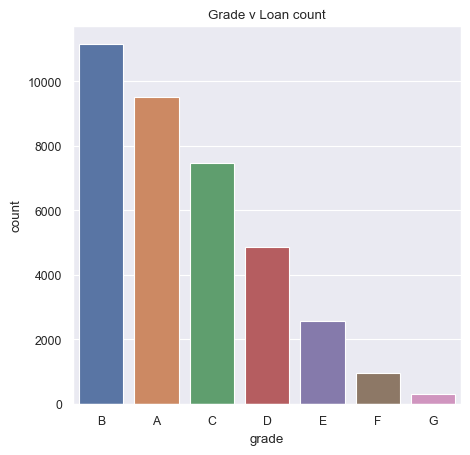

In [34]:
sns.set(context='paper')
plt.figure(figsize=[5.0,5.0],dpi=100,edgecolor='w',frameon=True)
plt.title(label='Grade v Loan count')
loan_grade_cat= pd.DataFrame(loan['grade'].value_counts().rename('count').reset_index())
loan_grade_cat.columns = ['grade','count']
sns.barplot(x='grade', y='count', data=loan_grade_cat)

plt.show()

### 4.1Column=sub_grade [categorical] - LC assigned loan subgrade
- After plotting the bar plot we can observe majority of loans approved by LC seems to be From Grade A to F - because of low risk.

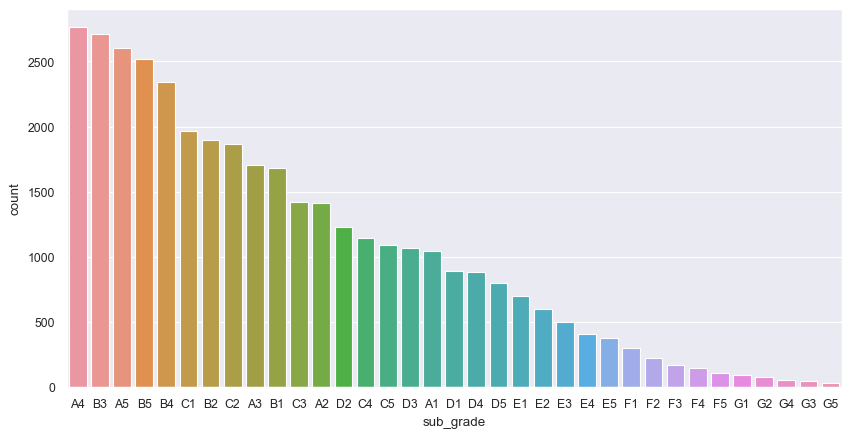

In [35]:
sns.set(context='paper')
plt.figure(figsize=[10.0,5.0],dpi=100,edgecolor='w',frameon=True)

loan_grade_cat= pd.DataFrame(loan['sub_grade'].value_counts().rename('count').reset_index())
loan_grade_cat.columns = ['sub_grade','count']
sns.barplot(x='sub_grade', y='count', data=loan_grade_cat)
plt.show()

#### 4.2 Univariate analysis- categorical -> column=addr_state
-  Column=addr_state [categorical] - The state provided by the borrower in the loan application
- After plotting the bar plot we can observe majority of loans applicants are from California CA,New york NY and florida FL  by LC seems to be From Grade A to D - because of low risk.

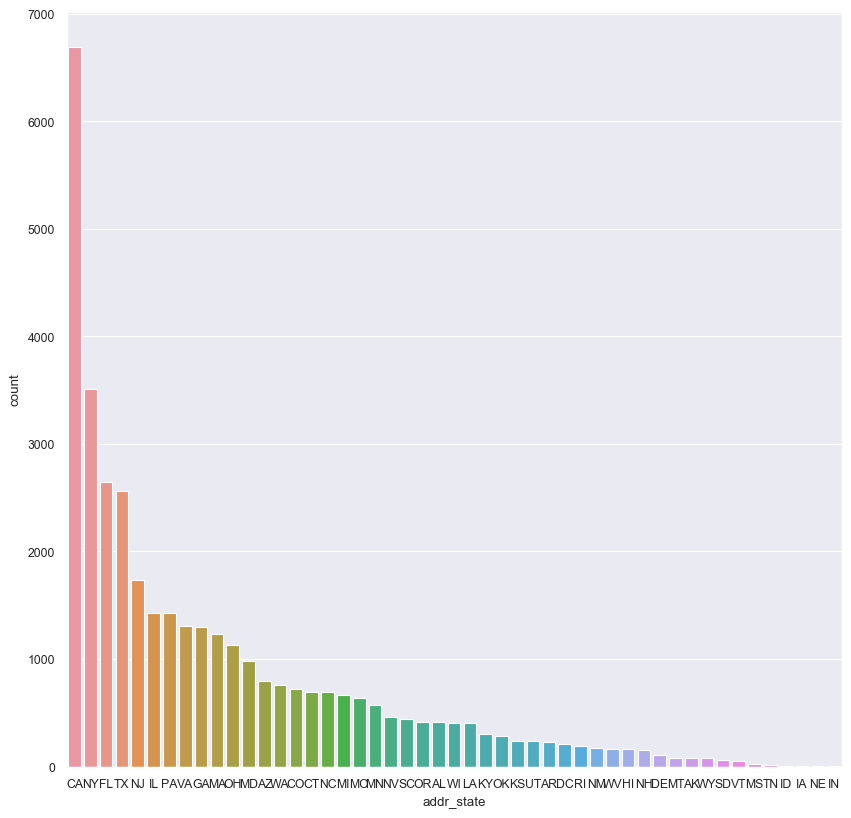

In [36]:
sns.set(context='paper')
plt.figure(figsize=[10.0,10.0],dpi=100,edgecolor='w',frameon=True)

loan_cat= pd.DataFrame(loan['addr_state'].value_counts().rename('count').reset_index())
loan_cat.columns = ['addr_state','count']
sns.barplot(x='addr_state', y='count', data=loan_cat)
plt.show()

#### 4.3 Univariate analysis- categorical -> column=purpose
-  Column=purpose [categorical] - A category provided by the borrower for the loan request. 
- After plotting the bar plot we can observe majority of loans are applied for debit consolidation purpose 

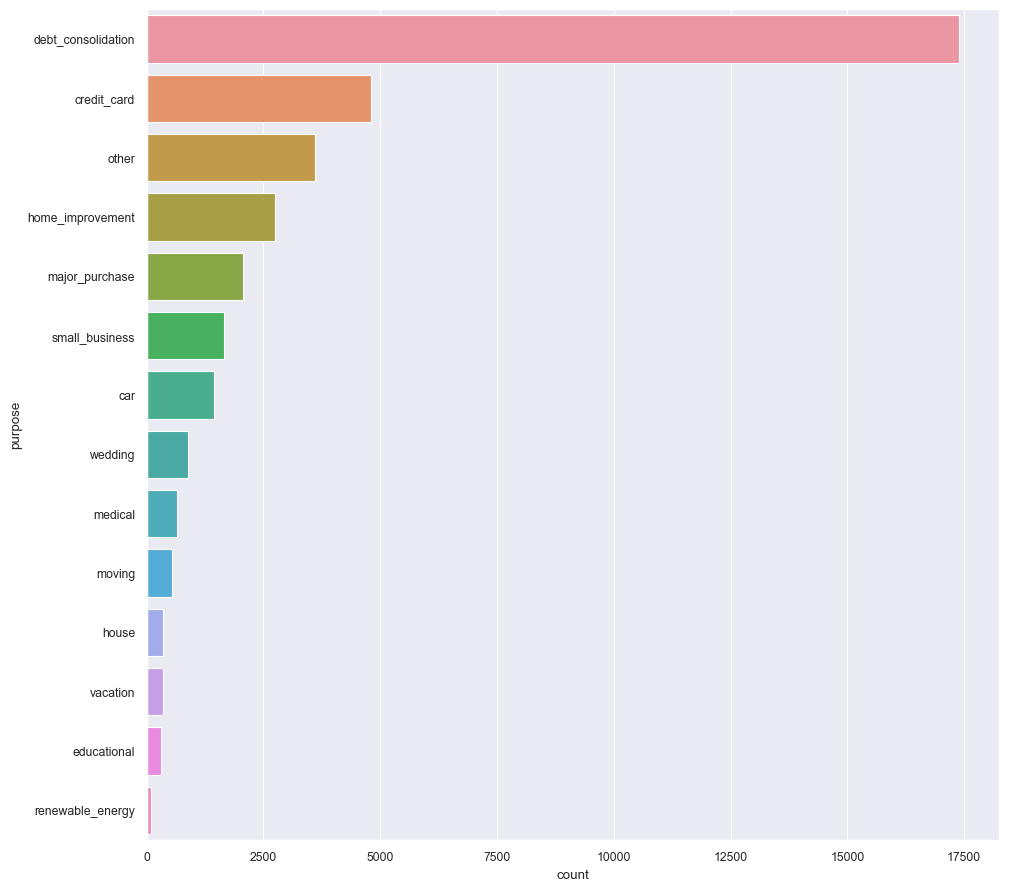

In [37]:
sns.set(context='paper')
plt.figure(figsize=[11.0,11.0],dpi=100,edgecolor='w',frameon=True)

loan_cat= pd.DataFrame(loan['purpose'].value_counts().rename('count').reset_index())
loan_cat.columns = ['purpose','count']
sns.barplot(y='purpose', x='count', data=loan_cat,orient='h')
plt.show()

- After plotting the bar plot we can observe majority of loans are applied for debit consolidation purpose

#### 4.3 Univariate analysis- categorical -> column=Enquiry in last 6 month
-  Column=inq_last_6mths [categorical] - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

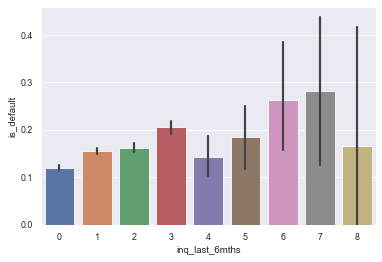

In [38]:
sns.barplot(y='is_default', x='inq_last_6mths', data=loan)
plt.show()

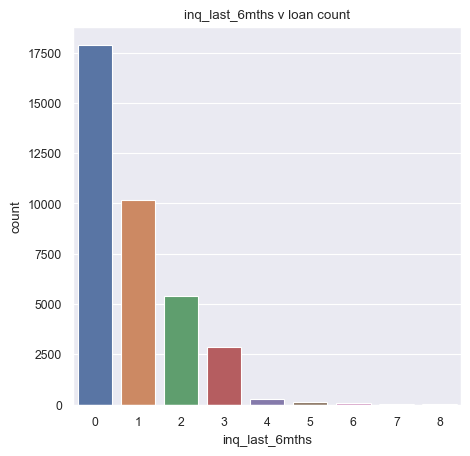

In [39]:
sns.set(context='paper')
plt.figure(figsize=[5.0,5.0],dpi=100,edgecolor='w',frameon=True)

loan_cat= pd.DataFrame(loan['inq_last_6mths'].value_counts().rename('count').reset_index())
loan_cat.columns = ['inq_last_6mths','count']
plt.title('inq_last_6mths v loan count')
sns.barplot(x='inq_last_6mths', y='count', data=loan_cat,orient='v')
plt.show()

## 5 Segmented univariate analysis
#### Below variables are being analysized due to there influence on loan default behaviour

In [40]:
loan['int_rate'].describe()

count   36847.00
mean       11.99
std         3.70
min         5.42
25%         8.94
50%        11.86
75%        14.52
max        24.40
Name: int_rate, dtype: float64

In [41]:
bins = list(range(0,30,5))
loan['binned_int_rate'] = pd.cut(loan['int_rate'], bins)
bins = list(range(0,32,4))
loan['binned_dti'] = pd.cut(loan['dti'], bins)

In [42]:
loan.annual_inc.describe()

count     36847.00
mean      69404.48
std       64027.47
min        4000.00
25%       41004.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [43]:
loan['annual_inc_binned'] = pd.qcut(loan['annual_inc'], q=8, precision=0)
loan['funded_amnt_binned'] = pd.qcut(loan['funded_amnt'], q=8, precision=0)

In [44]:
df_chargedoff = loan[loan.loan_status == 'Charged Off'] 

In [45]:
def seg_univariate_analysis(col,orient,title):
    fig = plt.figure(figsize=(8, 5))
    plt.title(label=title)
    seg_col_dist = (df_chargedoff[col].value_counts() / loan[col].value_counts()).to_frame(name='default_ratio').rename_axis(col).reset_index()
    if orient == 'v':        
        graph = sns.barplot(x=col, y='default_ratio', data=seg_col_dist)
    else:
        graph = sns.barplot(y=col, x='default_ratio', data=seg_col_dist,orient='h')
    plt.show()

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,pub_rec,pub_rec_bankruptcies,is_default,issue_month,issue_year,binned_loan_amnt,binned_dti,binned_int_rate,binned_annual_inc,binned_installment,annual_inc_binned,funded_amnt_binned
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,Jan-85,1,0,0.00,0,12,2011,"(0, 5000]","(24, 28]","(10, 15]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(3800.0, 5400.0]"
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,0.00,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,Apr-99,5,0,0.00,1,12,2011,"(0, 5000]","(0, 4]","(15, 20]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(499.0, 3800.0]"
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,Nov-01,2,0,0.00,0,12,2011,"(0, 5000]","(8, 12]","(15, 20]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(499.0, 3800.0]"
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,Feb-96,1,0,0.00,0,12,2011,"(5000, 10000]","(16, 20]","(10, 15]","(40000, 80000]","(300, 600]","(41004.0, 50000.0]","(9600.0, 12000.0]"
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,Nov-04,3,0,0.00,0,12,2011,"(0, 5000]","(8, 12]","(5, 10]","(0, 40000]","(0, 300]","(32000.0, 41004.0]","(3800.0, 5400.0]"


### 5.1 DTI analysis

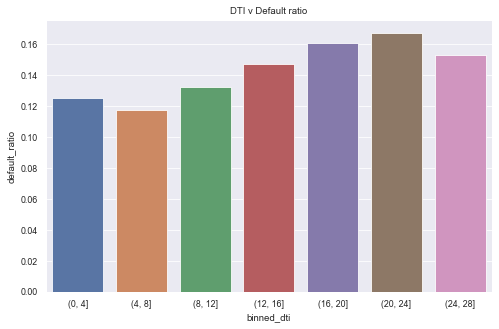

In [46]:
seg_univariate_analysis('binned_dti','v','DTI v Default ratio')

### 5.2 Binned Interest rate 

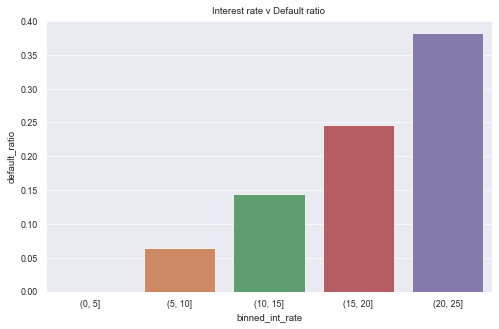

In [47]:
seg_univariate_analysis('binned_int_rate','v','Interest rate v Default ratio')

> Loans with higher interest rates are more likely to default


### 5.3 Loan Term analysis

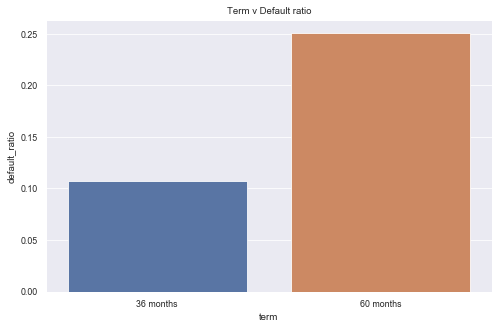

In [48]:
seg_univariate_analysis('term','v','Term v Default ratio')

> Customers are tend to default more when loan duration is more than 60 months

### 5.4 Loan Grade analysis

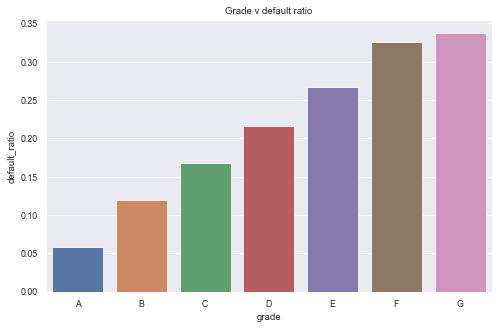

In [49]:
seg_univariate_analysis('grade','v','Grade v default ratio')

> Loan Wwithgrades like [G ,F, D, E]  are likely to default

### 5.5 Number of public record bankruptcies 

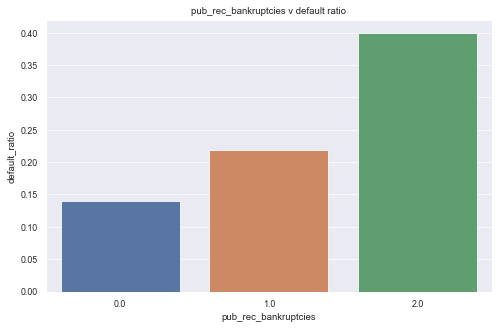

In [50]:
seg_univariate_analysis('pub_rec_bankruptcies','v','pub_rec_bankruptcies v default ratio')

> Default ratio is high where Customers with public record of bankruptcies 

### 5.6 Number of derogatory public records

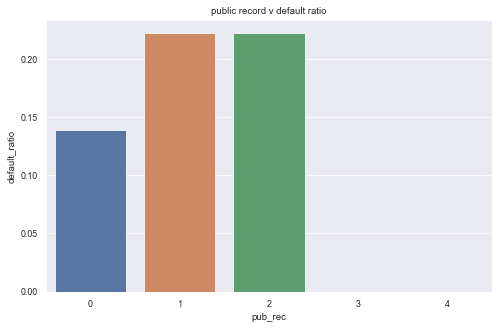

In [51]:
seg_univariate_analysis('pub_rec','v','public record v default ratio')

> customers with derogatory public records are likely to default

### 5.6 Loan Purpose analysis

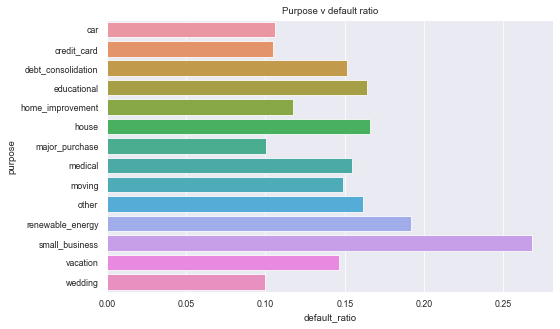

In [52]:
seg_univariate_analysis('purpose','h','Purpose v default ratio')

> Default ratio is high with customers who have taken lon with a purpose of 'Small business'

### 5.7 Analysis on number of inquiries in past 6 months (excluding auto and mortgage inquiries)

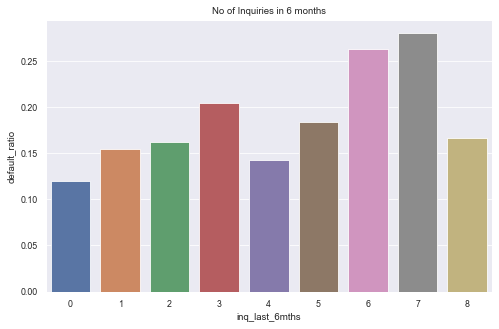

In [53]:
seg_univariate_analysis('inq_last_6mths','v','No of Inquiries in 6 months')

> With number of inquiries in past 6 months increase the default ratio

### 5.8 Installments

In [54]:
loan['installment'].describe()

count   36847.00
mean      324.69
std       208.89
min        16.08
25%       167.56
50%       280.00
75%       428.98
max      1305.19
Name: installment, dtype: float64

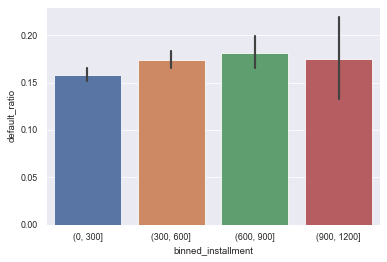

In [55]:
bins = list(range(0,1500,300))

col_dist = (df_chargedoff['installment'].value_counts() / loan['installment'].value_counts()).to_frame(name='default_ratio').rename_axis('installment').reset_index().fillna(0)
col_dist['binned_installment'] = pd.cut(col_dist['installment'], bins)
sns.barplot(data=col_dist,x='binned_installment', y='default_ratio')
plt.show()

> We can see that the installment column has a direct relationship with the default ratio

### 5.9 Sub grade analysis

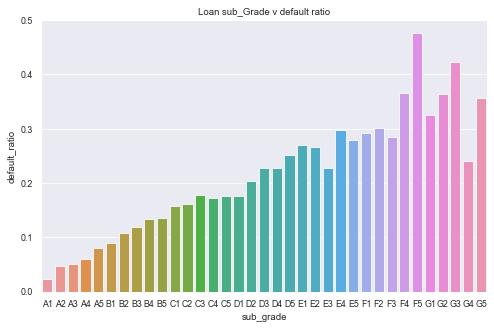

In [56]:
seg_univariate_analysis('sub_grade','v' ,"Loan sub_Grade v default ratio")

> Defaulter are likely to raise based on  sub grade 

### 5.10  Funded amount - binned - segmented univariate analysis

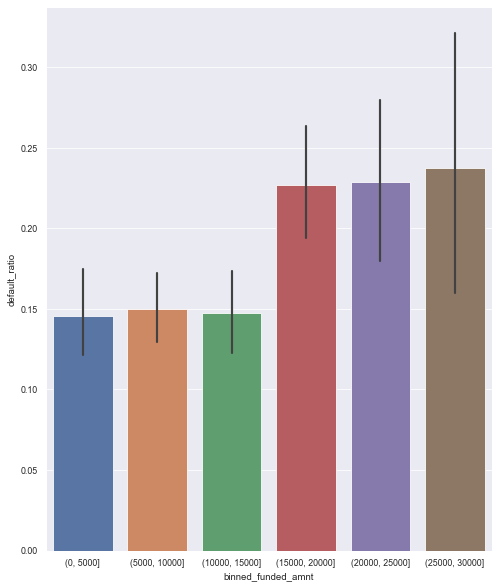

In [58]:
loan['funded_amnt'].describe()
bins = list(range(0,35000,5000))

col_dist = (df_chargedoff['funded_amnt'].value_counts() / loan['funded_amnt'].value_counts()).to_frame(name='default_ratio').rename_axis('funded_amnt').reset_index().fillna(0)
col_dist['binned_funded_amnt'] = pd.cut(col_dist['funded_amnt'], bins)
fig = plt.figure(figsize=(8, 10))
sns.barplot(data=col_dist,x='binned_funded_amnt', y='default_ratio')

plt.show()

> Higher the funded amount higher the chance of default rate

### 5.11 Annual income - binned - segmented univariate analysis

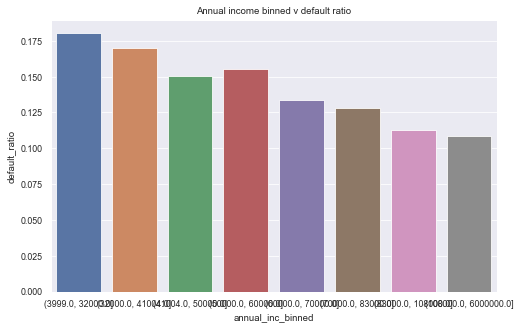

In [59]:
seg_univariate_analysis('annual_inc_binned','v','Annual income binned v default ratio')

> If the annual income is low higher the chance/percentage of default ratio

### No significance of verification and home ownership on default behaviour

## 6. Bivariate analysis

In [60]:
loan.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,pub_rec,pub_rec_bankruptcies,is_default,issue_month,issue_year
loan_amnt,1.00,0.98,0.95,0.30,0.93,0.15,0.27,0.06,0.01,-0.05,-0.03,0.06,0.05,0.12
funded_amnt,0.98,1.00,0.97,0.30,0.96,0.15,0.27,0.06,0.01,-0.05,-0.03,0.06,0.04,0.13
funded_amnt_inv,0.95,0.97,1.00,0.29,0.92,0.16,0.26,0.06,0.00,-0.05,-0.04,0.04,0.06,0.22
int_rate,0.30,0.30,0.29,1.00,0.27,-0.00,0.05,0.11,0.14,0.10,0.08,0.21,0.02,0.03
installment,0.93,0.96,0.92,0.27,1.00,0.12,0.27,0.05,0.01,-0.04,-0.03,0.03,0.03,0.06
emp_length,0.15,0.15,0.16,-0.00,0.12,1.00,0.11,0.05,0.01,0.06,0.06,0.02,0.02,0.11
annual_inc,0.27,0.27,0.26,0.05,0.27,0.11,1.00,-0.12,0.03,-0.01,-0.01,-0.04,0.01,0.01
dti,0.06,0.06,0.06,0.11,0.05,0.05,-0.12,1.00,0.00,-0.01,0.01,0.04,0.01,0.08
inq_last_6mths,0.01,0.01,0.00,0.14,0.01,0.01,0.03,0.00,1.00,0.02,0.01,0.07,0.02,-0.06
pub_rec,-0.05,-0.05,-0.05,0.10,-0.04,0.06,-0.01,-0.01,0.02,1.00,0.84,0.05,-0.02,-0.02


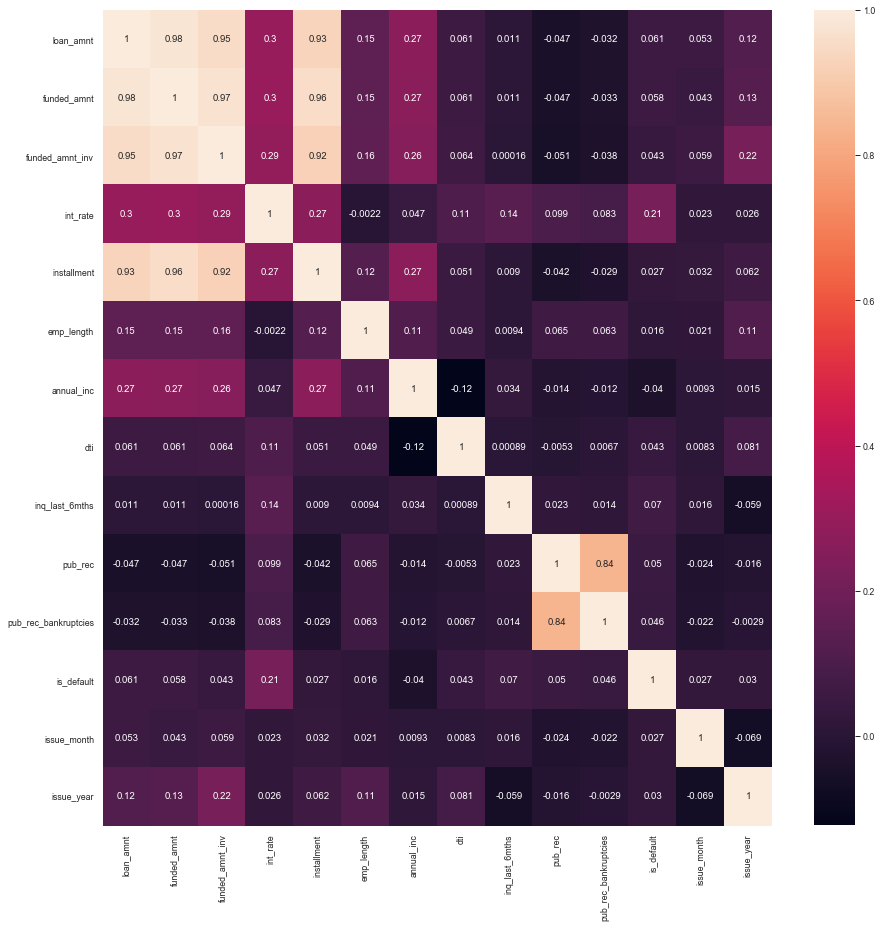

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(data=loan.corr(), annot=True)
plt.show()

In [62]:
loan['purpose'].value_counts()

debt_consolidation    17384
credit_card            4801
other                  3608
home_improvement       2737
major_purchase         2061
small_business         1657
car                    1431
wedding                 894
medical                 647
moving                  543
house                   349
vacation                342
educational             299
renewable_energy         94
Name: purpose, dtype: int64

#### The main purposes of loan are
1. debt_consolidation
2. credit_card
3. other
4. home_improvement
5. major_purchase

*and these will be considered for analysis*

In [63]:
df_with_5_purposes = loan[loan['purpose'].isin(['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase'])]

In [64]:
df_with_5_purposes['purpose'].value_counts()

debt_consolidation    17384
credit_card            4801
other                  3608
home_improvement       2737
major_purchase         2061
Name: purpose, dtype: int64

#### Purpose with term

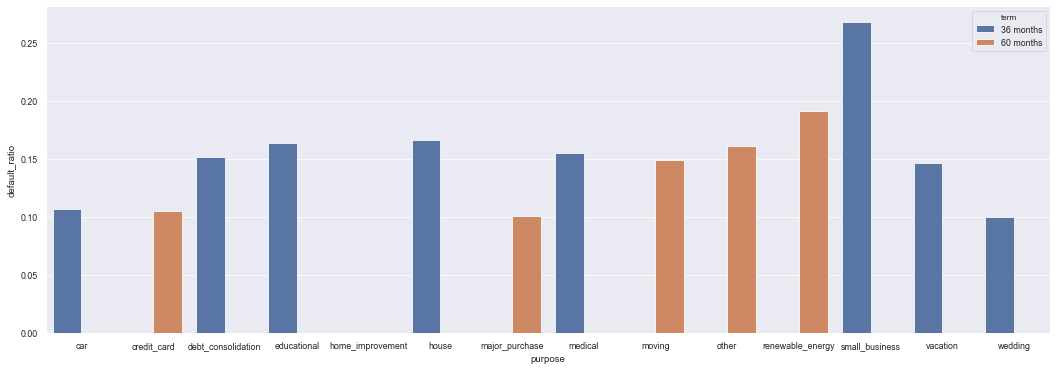

In [65]:
plt.figure(figsize=(18,6))
col_dist = (df_chargedoff['purpose'].value_counts() / loan['purpose'].value_counts()).to_frame(name='default_ratio').rename_axis('purpose').reset_index()
col_dist['term'] = loan['term']
sns.barplot(data=col_dist, x='purpose', y='default_ratio',hue='term')
plt.show()


In [66]:
#Bivariate function to plot the graphs for categorical variables based on the parameters provided        
#taking out Total loan status count for the columns 'category1' and 'category2'
    
def bivariate_cat(df_loan,catone, cattwo , x_label, title1, fig_size):
           
    
    ##taking out 'Charged off' loan status count for the columns 'category1' and 'category2'
    default_loan = df_loan.loc[loan.loan_status == 'Charged Off'].groupby(by=[catone,cattwo])['loan_status'].count().rename('Default_count').sort_values(ascending=False).reset_index()

    
    loan_total1 = df_loan.groupby(by=[catone,cattwo])['loan_status'].count().rename('Total_count').sort_values(ascending=False).reset_index()

    ##merge above two dataframes so percentage for charged off/default can be calculated
    merge_loan_df = pd.merge(loan_total1,default_loan,how='inner',on=[catone,cattwo])
    merge_loan_df['default_percentage'] = round(merge_loan_df['Default_count']/merge_loan_df['Total_count']*100,2)

    plt.figure(figsize=fig_size,dpi=120,frameon=True)
    sns.barplot(x=catone, y='default_percentage', hue=cattwo,data=merge_loan_df)
    plt.ylabel("Loan Status = Default %")
    plt.xlabel(x_label)
    plt.title(title1)
    plt.show()

### Bivariate Categorical analysis 
### 6.1 Analysis of "loan_status" column on categorical variables "grade" and "term"


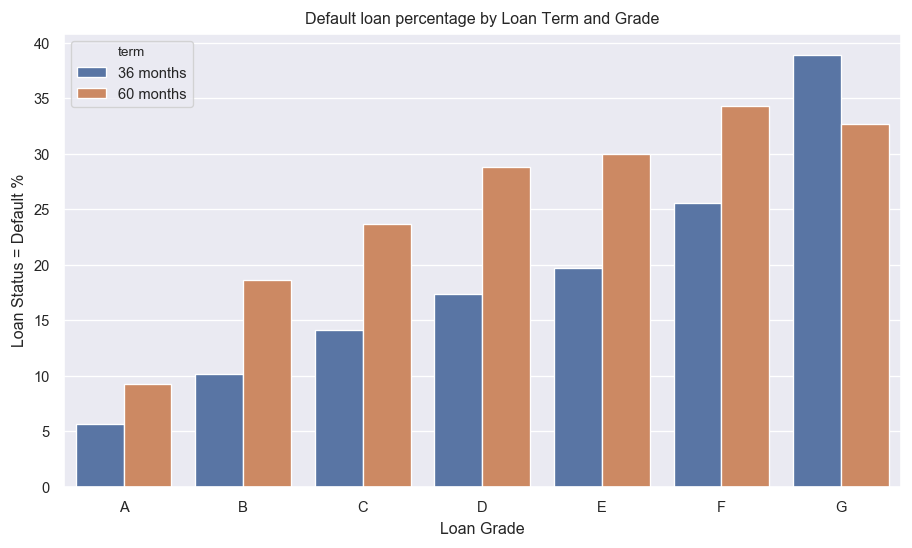

In [67]:
bivariate_cat(loan,'grade','term', "Loan Grade", "Default loan percentage by Loan Term and Grade" , [9.0,5.0] )

- Outcome:
> - Loan default ratio of Grade A and B are irrespective of loan terms
> - Grade C and D with term of 36 months are likely to repay.
> - Default ratio is high with respect to lower order loan term G,F,E

### 6.2 Bivariate categorical analysis of "loan_status" based on "pub_rec_bankruptcies" and "inq_last_6mths_recat"


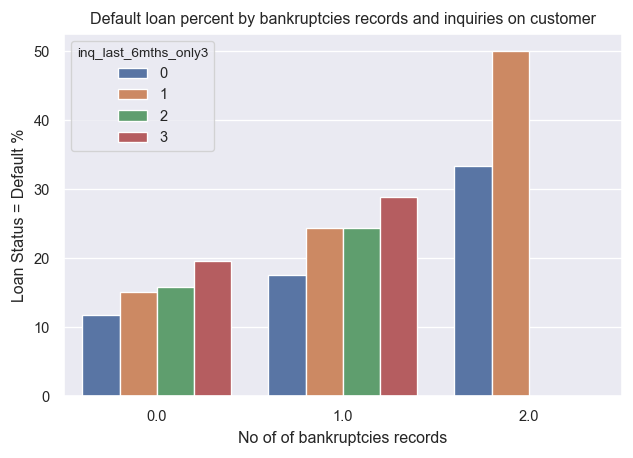

In [68]:
loan["inq_last_6mths_only3"] = loan["inq_last_6mths"].apply(lambda x:3 if(x>3) else x)
bivariate_cat(loan, 'pub_rec_bankruptcies','inq_last_6mths_only3', "No of of bankruptcies records", 
                      "Default loan percent by bankruptcies records and inquiries on customer", [6.0,4.0])

> Customers with 3 or more inquiries in last 6 months are risky and Customers with Public bankruptcy record or Public derogatory records are more likely to default.

### 6.3 Bivariate categorical analysis of "loan_status" based on "annual_inc_binned" and "funded_amnt_binned"

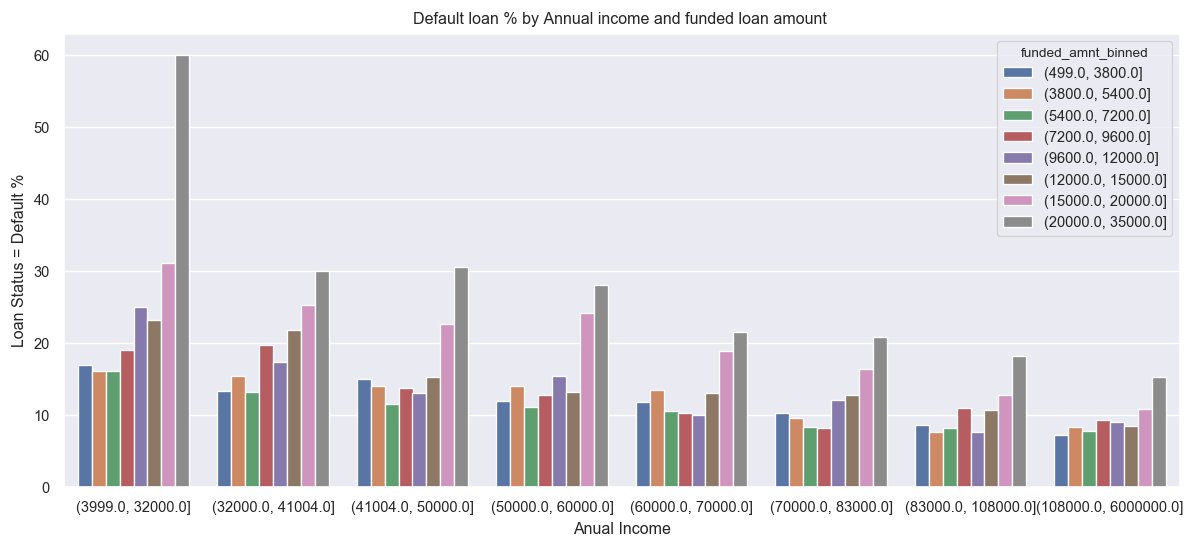

In [69]:
bivariate_cat(loan, 'annual_inc_binned','funded_amnt_binned', "Anual Income", 
                      "Default loan % by Annual income and funded loan amount ", [12.0,5.0])

> If funded loan amount is above  15,000 USD for customer with < 70,000 USD is risky and should be avoided

### 6.4 Bivariate categorical analysis of "loan_status" based on "states" and "purpose"

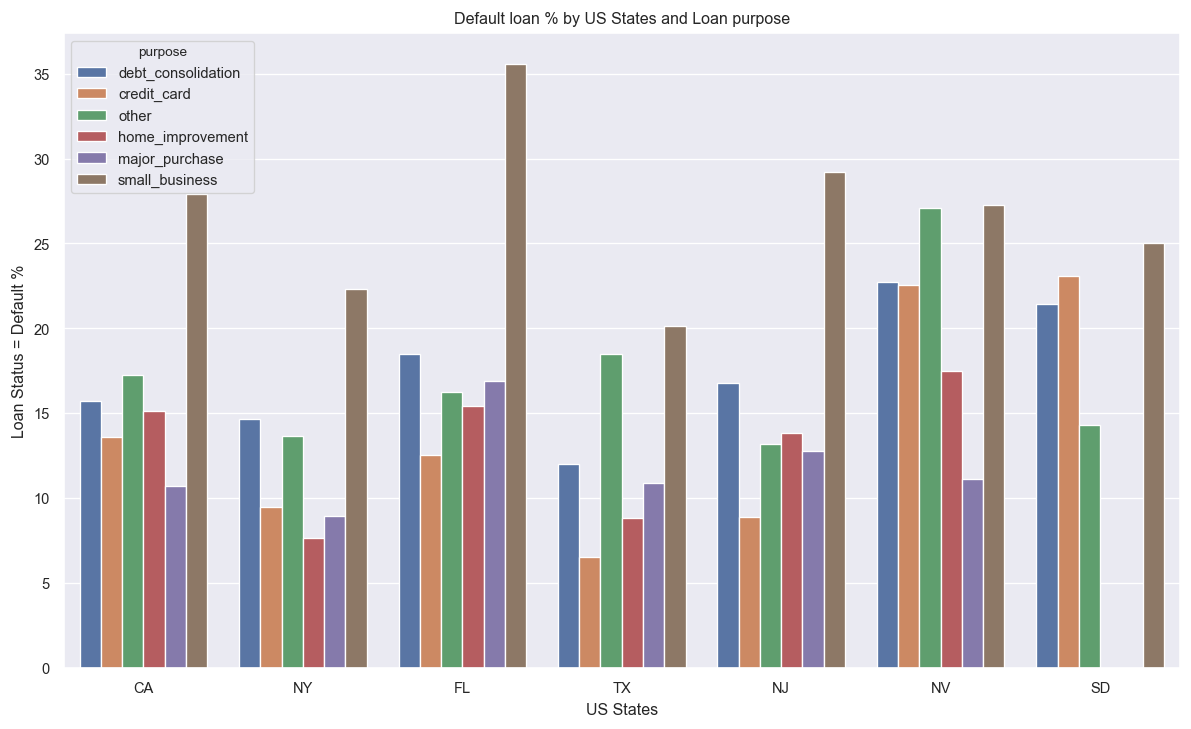

In [70]:
df_loan_state = loan[loan["addr_state"].isin(["CA", "NY", "FL", "TX", "NJ", "NV", "SD"]) ]
df_loan_state = df_loan_state[df_loan_state["purpose"].isin(["debt_consolidation", "credit_card", 
                                              "home_improvement", "major_purchase", "small_business","other"]) ]
bivariate_cat(df_loan_state, 'addr_state','purpose', "US States", 
                      "Default loan % by US States and Loan purpose", [12.0,7.0])

In [71]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,pub_rec,pub_rec_bankruptcies,is_default,issue_month,issue_year,binned_loan_amnt,binned_dti,binned_int_rate,binned_annual_inc,binned_installment,annual_inc_binned,funded_amnt_binned,inq_last_6mths_only3
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,Jan-85,1,0,0.00,0,12,2011,"(0, 5000]","(24, 28]","(10, 15]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(3800.0, 5400.0]",1
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,0.00,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,Apr-99,5,0,0.00,1,12,2011,"(0, 5000]","(0, 4]","(15, 20]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(499.0, 3800.0]",3
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,Nov-01,2,0,0.00,0,12,2011,"(0, 5000]","(8, 12]","(15, 20]","(0, 40000]","(0, 300]","(3999.0, 32000.0]","(499.0, 3800.0]",2
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,Feb-96,1,0,0.00,0,12,2011,"(5000, 10000]","(16, 20]","(10, 15]","(40000, 80000]","(300, 600]","(41004.0, 50000.0]","(9600.0, 12000.0]",1
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,Nov-04,3,0,0.00,0,12,2011,"(0, 5000]","(8, 12]","(5, 10]","(0, 40000]","(0, 300]","(32000.0, 41004.0]","(3800.0, 5400.0]",3


> Customers applying loan for 'small business’ purpose are more likely to default.